In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [3]:
from nltk.corpus import twitter_samples

In [7]:
tweets = twitter_samples.strings()

In [8]:
len(tweets)

30000

In [10]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')

In [11]:
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [12]:
len(all_positive_tweets)

5000

In [13]:
len(all_negative_tweets)

5000

In [14]:
type(all_positive_tweets)

list

In [15]:
all_positive_tweets[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [16]:
%pip install matplotlib

  Using cached matplotlib-3.2.2-cp37-cp37m-macosx_10_9_x86_64.whl (12.5 MB)
  Using cached numpy-1.19.0-cp37-cp37m-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (60 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
from matplotlib import pyplot as plt

In [18]:
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [19]:
labels = ['Positive', 'Negative']

In [20]:
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

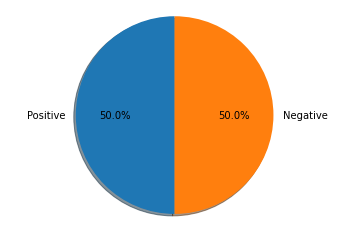

In [27]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [30]:
import random

In [34]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

Photoset: katmtan: For the Swan Queen fandom :) Sorry the others are blurry! I was so far away and was... http://t.co/uVAZ6cA1Ig


In [35]:
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@mrBobbyBones I've been trying to call for 20mins and getting a busy signal! :( I want to request the Yahoo yodel!


In [36]:
import re

In [37]:
import string

In [38]:
from nltk.corpus import stopwords

In [39]:
from nltk.stem import PorterStemmer

In [40]:
from nltk.tokenize import TweetTokenizer

In [41]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [42]:
stemmer = PorterStemmer()

In [69]:
stop_words = stopwords.words()

def process_tweet(tweet):
    tokens = tokenizer.tokenize(tweet)
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return [stemmer.stem(token) for token in tokens]

In [70]:
from tqdm import tqdm

In [71]:
processed_positive_tweets = [process_tweet(tweet) for tweet in tqdm(all_positive_tweets)]

100%|██████████| 5000/5000 [00:04<00:00, 1012.27it/s]


In [72]:
processed_negative_tweets = [process_tweet(tweet) for tweet in tqdm(all_negative_tweets)]

100%|██████████| 5000/5000 [00:04<00:00, 1055.04it/s]


In [74]:
processed_positive_tweets[0]

['#followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In [75]:
processed_positive_tweets[1]

['hey',
 'jame',
 'odd',
 ':/',
 'pleas',
 'call',
 'contact',
 'centr',
 '02392441234',
 'abl',
 'assist',
 ':)',
 'mani',
 'thank']

In [76]:
positive_freq = {}
for tweet in processed_positive_tweets:
    for word in tweet:
        positive_freq[word] = positive_freq.get(word, 0) + 1

In [77]:
positive_freq

{'#followfriday': 25,
 'top': 32,
 'engag': 7,
 'member': 16,
 'commun': 32,
 'week': 83,
 ':)': 3691,
 'hey': 77,
 'jame': 7,
 'odd': 2,
 ':/': 5,
 'pleas': 99,
 'call': 37,
 'contact': 7,
 'centr': 2,
 '02392441234': 1,
 'abl': 8,
 'assist': 1,
 'mani': 33,
 'thank': 643,
 'listen': 17,
 'last': 47,
 'night': 68,
 'bleed': 2,
 'amaz': 51,
 'track': 5,
 'scotland': 2,
 'congrat': 21,
 'yeaaah': 1,
 'yipppi': 1,
 'accnt': 2,
 'verifi': 2,
 'rqst': 1,
 'succeed': 1,
 'got': 68,
 'blue': 9,
 'tick': 1,
 'mark': 1,
 'fb': 5,
 'profil': 2,
 '15': 4,
 'day': 245,
 'irresist': 2,
 '#flipkartfashionfriday': 17,
 'http://t.co/ebz0l2venm': 1,
 'like': 232,
 'keep': 68,
 'love': 398,
 'custom': 4,
 'wait': 70,
 'long': 36,
 'hope': 143,
 'enjoy': 78,
 'happi': 206,
 'friday': 104,
 'lwwf': 1,
 'https://t.co/smyyriipxi': 1,
 'second': 10,
 'thought': 29,
 '’': 21,
 'enough': 18,
 'time': 128,
 'dd': 1,
 'new': 146,
 'short': 7,
 'enter': 9,
 'system': 2,
 'sheep': 1,
 'must': 19,
 'buy': 12,
 'jg

In [78]:
negative_freq = {}
for tweet in processed_negative_tweets:
    for word in tweet:
        negative_freq[word] = negative_freq.get(word, 0) + 1

In [79]:
negative_freq

{'hopeless': 2,
 'tmr': 3,
 ':(': 4585,
 'everyth': 17,
 'kid': 20,
 'section': 3,
 'ikea': 1,
 'cute': 43,
 'shame': 19,
 "i'm": 343,
 'nearli': 3,
 '19': 8,
 '2': 42,
 'month': 23,
 'heart': 27,
 'slide': 1,
 'wast': 5,
 'basket': 1,
 '“': 15,
 'hate': 57,
 'japanes': 4,
 'call': 29,
 'bani': 2,
 '”': 15,
 'dang': 2,
 'start': 44,
 'next': 40,
 'week': 56,
 'work': 133,
 'oh': 92,
 'god': 15,
 'babi': 47,
 'face': 2,
 'https://t.co/9fcwgvaki0': 1,
 'make': 102,
 'smile': 10,
 'neighbour': 1,
 'motor': 1,
 'ask': 29,
 'said': 33,
 'updat': 11,
 'search': 3,
 'http://t.co/xvmtuikwln': 1,
 'sialan': 1,
 'https://t.co/hv1i0xcrl2': 1,
 'athabasca': 1,
 'glacier': 1,
 '#1948': 1,
 ':-(': 501,
 '#athabasca': 1,
 '#glacier': 1,
 '#jasper': 1,
 '#jaspernationalpark': 1,
 '#alberta': 1,
 '#explorealberta': 1,
 '…': 18,
 'http://t.co/dzzdqmf7cz': 1,
 'realli': 133,
 'good': 101,
 'g': 8,
 'idea': 10,
 'never': 57,
 'go': 224,
 'meet': 32,
 'mare': 1,
 'ivan': 1,
 'happi': 25,
 'trip': 10,
 'kee

In [81]:
len(positive_freq.keys())

7831

In [82]:
len(negative_freq.keys())

6974

In [84]:
len(positive_freq.keys() & negative_freq.keys())

2577

In [85]:
common_keys = list(positive_freq.keys() & negative_freq.keys())

In [86]:
common_keys

['burn',
 'sheep',
 'wide',
 'nyc',
 "yesterday'",
 'flat',
 'fall',
 'sum',
 'parent',
 'lead',
 '111',
 'glass',
 'loser',
 'item',
 'come',
 "he'",
 'lover',
 'bland',
 'manga',
 'releas',
 'marathon',
 'nahi',
 '#me',
 'hunni',
 '#sex',
 'clutch',
 '#tagsforlik',
 'earli',
 'awhil',
 'max',
 'goodby',
 'certain',
 'stick',
 'tho',
 'chat',
 'pure',
 'influenc',
 'due',
 'quit',
 'type',
 'person',
 'ice',
 'mexico',
 'germani',
 'might',
 'ee',
 "else'",
 'hk',
 'gold',
 'major',
 'colour',
 '#girl',
 'gen',
 'chain',
 'harm',
 'retweet',
 '#choiceinternationalartist',
 'bae',
 'claim',
 'pig',
 'peopl',
 'tim',
 'box',
 'goat',
 'fave',
 'area',
 '💘',
 'initi',
 'linda',
 'hbd',
 'made',
 'languag',
 'jojo',
 'pub',
 'opportun',
 'slap',
 'side',
 'playlist',
 'wow',
 'richard',
 '5so',
 'fk',
 'pl',
 'result',
 'realis',
 'attach',
 'vocal',
 'fallout',
 'respond',
 'ty',
 'pretti',
 'think',
 'breakfast',
 'pool',
 'queen',
 "why'd",
 'normal',
 'stack',
 'cold',
 'ouch',
 'tric

/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/robikos/anaconda3/

/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128131 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127865 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127874 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/robikos/anaconda3/envs/nlp/l

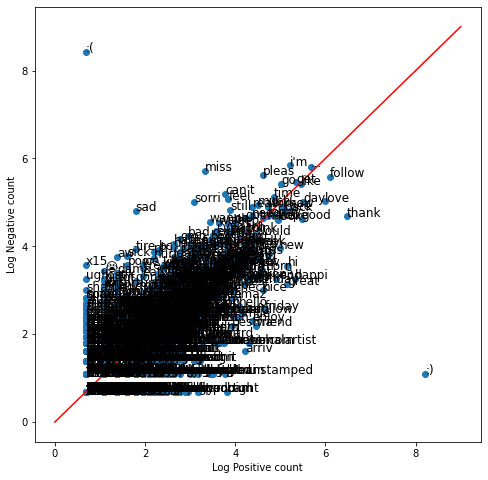

In [104]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

positive_commons = [positive_freq.get(word, 0) for word in common_keys]
negative_commons = [negative_freq.get(word, 0) for word in common_keys]

x = np.log([x + 1 for x in positive_commons])
y = np.log([y + 1 for y in negative_commons])

ax.scatter(x, y)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(common_keys)):
    ax.annotate(common_keys[i], (x[i], y[i]), fontsize=12)
    
ax.plot([0, 9], [0, 9], color = 'red')
plt.show()

In [105]:
# Assignment